In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipynb.fs.defs.webscraping import Paths
from datetime import datetime

In [2]:
df = pd.read_csv(
    fr'{Paths.data_processed}\job_offers_{datetime.today().strftime("%d-%m-%Y")}.csv',
    sep=';',
    encoding='utf-8',
)
df

,name,company,technology,job,location_city,location_country,salary_low,salary_high,salary_currency,salary_average,is_senior
0,Data Analyst,FLYR Poland sp.z.o.o,SQL,data analyst,Kraków,POL,11 000,16 000,PLN,13500.0,False
1,Junior Data Analyst,Coinfirm,mysql,data analyst,Zdalna,NaN,3 000,5 000,PLN,4000.0,False
2,Junior Technical Product Manager,Scalaric,NaN,data analyst,Kraków,POL,5 000,10 000,PLN,7500.0,False
3,Business System Analyst (Data&Analytics),Elitmind,NaN,data analyst,Zdalna,NaN,15 000,21 000,PLN,18000.0,False
4,Data analyst (analityk danych),Alterdata.io sp. z o.o.,NaN,data analyst,Zdalna,NaN,12 000,21 000,PLN,16500.0,False
...,...,...,...,...,...,...,...,...,...,...,...
134,Data Scientist,Simon - Kucher & Partners,NaN,data scientist,Zdalna,NaN,13 000,15 000,PLN,14000.0,False
135,Senior Data Scientist,Relayr,python,data scientist,Katowice,POL,21 000,24 000,PLN,22500.0,True
136,Senior Data Scientist,hubQuest,python,data scientist,Zdalna,NaN,25 000,34 000,PLN,29500.0,True
137,Data Scientist,Avanade Poland,python,data scientist,Warszawa,POL,15 000,25 000,PLN,20000.0,False


### Exploring and analysing the data

In [3]:
df.groupby(by='job').size()

job
data analyst      27
data engineer     84
data scientist    28
dtype: int64

In [4]:
job_count = df['job'].value_counts()
job_titles = df['job'].value_counts().index

**Number of jobs found for each search query**

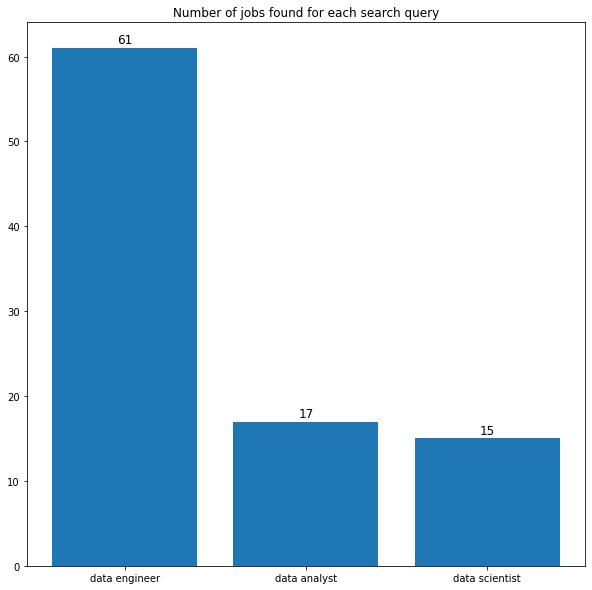

In [109]:
plt.figure(figsize=(10, 10))

plt.bar(job_titles, job_count)
plt.title('Number of jobs found for each search query')

for elem in range(len(job_titles)):
    plt.text(elem, job_count[elem] + 1, job_count[elem], va='center', ha='center', size='large')

plt.show()

**Average salary for each search query**

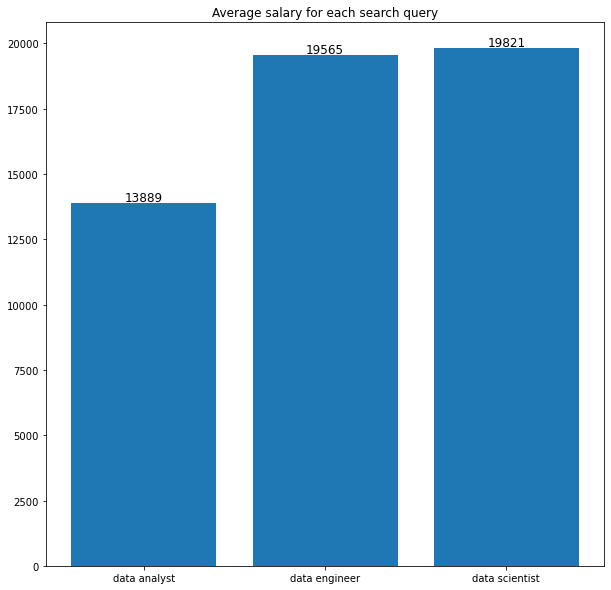

In [13]:
avg_salaries = {}
df_grouped = df.groupby('job')

for key in df_grouped.groups.keys():
    avg_salaries[key] = round(df_grouped.get_group(key)['salary_average'].mean())

plt.figure(figsize=(10, 10))
plt.bar(avg_salaries.keys(), avg_salaries.values())
plt.title('Average salary for each search query')

for key, value in avg_salaries.items():
    plt.text(key, value+200, value, va='center', ha='center', size='large')
    
plt.show()

**Number of offers in each city (including remote work)**

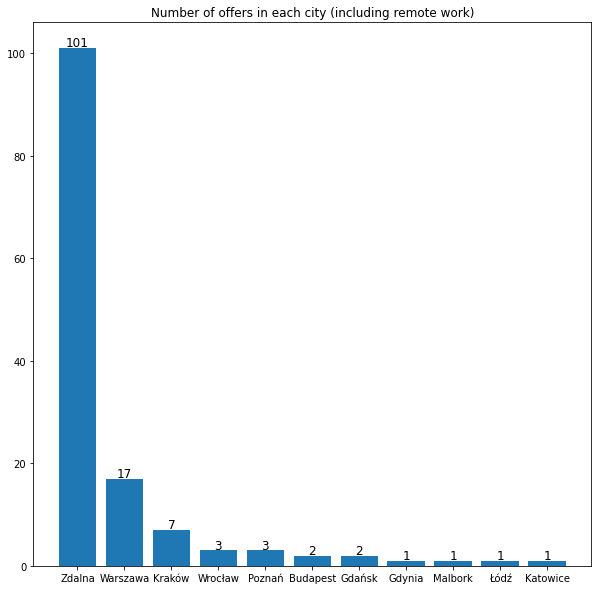

In [6]:
offers_count = df['location_city'].value_counts()
cities = df['location_city'].value_counts().index

plt.figure(figsize=(10, 10))

plt.bar(cities, offers_count)
plt.title(r'Number of offers in each city (including remote work)')

for elem in range(len(cities)):
    plt.text(elem, offers_count[elem] + 1, offers_count[elem], va='center', ha='center', size='large')

plt.show()

**Finding the highest salaries**

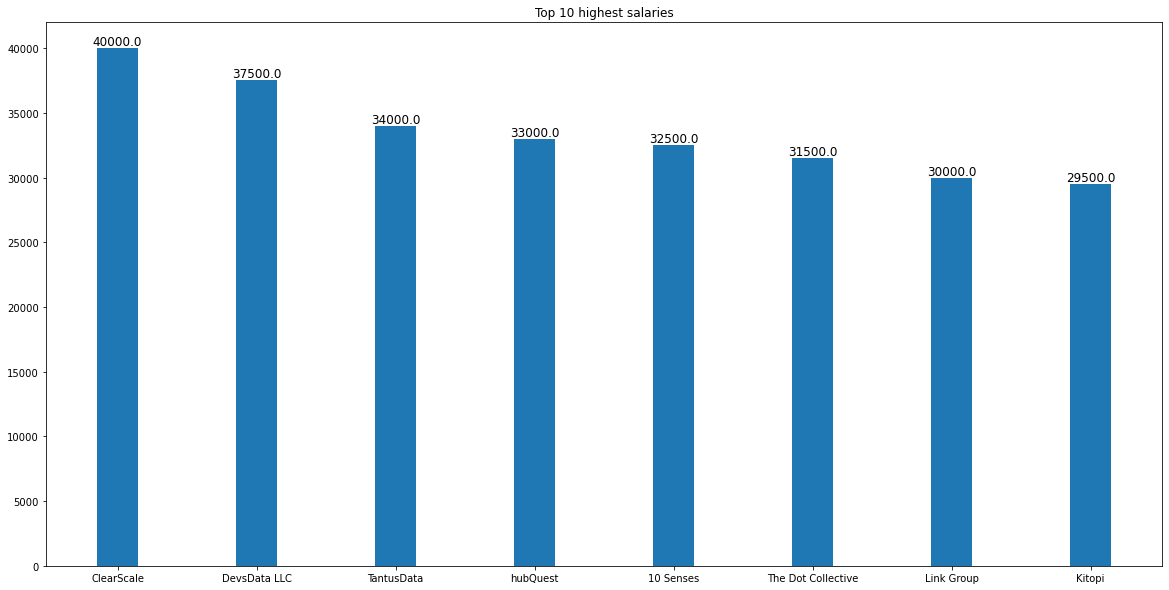

In [8]:
df_sorted = df.sort_values('salary_average', ascending=False)
df_highest_salaries = df_sorted.head(10)
companies = df_highest_salaries['company'].unique()
salaries = df_highest_salaries['salary_average'].unique()

plt.figure(figsize=(20, 10))

plt.bar(companies, salaries, align='center', width=0.3)
plt.title('Top 10 highest salaries')

for elem in range(salaries.shape[0]):
    plt.text(companies[elem], salaries[elem]+500, salaries[elem], va='center', ha='center', size='large')

plt.show()

**Difference in salary between senior job titles and regular job titles in each job category**

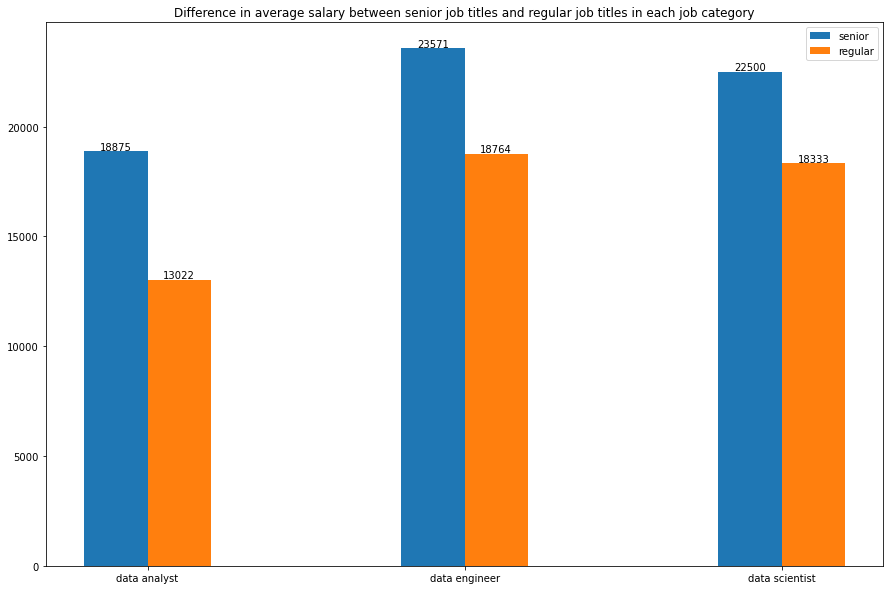

In [9]:
df_grouped_by_job = df.groupby(['job', 'is_senior'])
senior_avg_salaries = {}
non_senior_avg_salaries = {}

for (job, is_senior) in df_grouped_by_job.groups.keys():
    if is_senior:
        senior_avg_salaries[job] = df_grouped_by_job.get_group((job, is_senior))['salary_average'].mean()
    else:
        non_senior_avg_salaries[job] = df_grouped_by_job.get_group((job, is_senior))['salary_average'].mean()

x = np.array(range(len(senior_avg_salaries.keys())))
y_senior = np.array(list(senior_avg_salaries.values()))
y_non_senior = np.array(list(non_senior_avg_salaries.values()))

plt.figure(figsize=(15, 10))
ax = plt.subplot(111)
ax.bar(
    x-0.1, 
    y_senior,
    width = 0.2,
    label='senior'
)
ax.bar(
    x+0.1, 
    y_non_senior,
    width = 0.2,
    label='regular',
)

for i in range(len(senior_avg_salaries.keys())):
    plt.text(i-0.1, y_senior[i]+200, round(y_senior[i]), va='center', ha='center')
    plt.text(i+0.1, y_non_senior[i]+200, round(y_non_senior[i]), va='center', ha='center')

plt.xticks(range(3), list(df['job'].unique()))
plt.legend()
plt.title('Difference in average salary between senior job titles and regular job titles in each job category')

plt.show()

**Rounding up a team consisting of data analyst, data engineer and data scientist, while minimizng the cost of hiring them**

In [10]:
cost = df.groupby('job')['salary_average'].min().sum()

print(f"Minimal cost of hiring a team consisting of data analyst, data engineer and data scientist: {cost} PLN")

Minimal cost of hiring a team consisting of data analyst, data engineer and data scientist: 13500.0 PLN


**Finding out in wich city (including remote work) it's possible to round up the whole team, while minimizing the cost of hiring**

In [12]:
df_grouped = df.groupby(['location_city', 'job'])['salary_average'].min().reset_index(name='min_salary')
min_cost = df['salary_average'].max()

for city in df_grouped['location_city'].unique():
    num_of_jobs = df_grouped.loc[df_grouped['location_city'] == city]['job'].count()
    cost = df_grouped.loc[df_grouped['location_city'] == city]['min_salary'].sum()
    
    if num_of_jobs == 3 and cost < min_cost:
        min_cost = cost
        location = city
    else:
        cost = None
        
if cost:
    print("It's not possible to round up the whole team in one city")
else:
    print(f"The cost of hiring the whole team in {location}: {min_cost} PLN")


The cost of hiring the whole team in Warszawa: 16000.0 PLN
